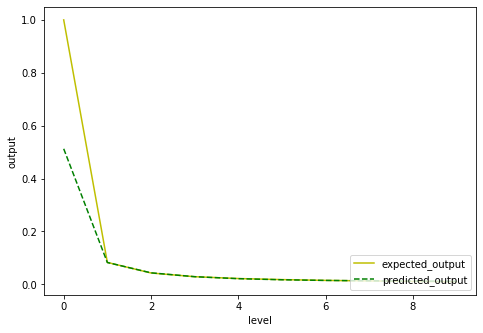

In [61]:
import matplotlib.pyplot as plt
import numpy as np



class NN:

	

    def initialize_parameters(self, n_x, n_h, n_y):
        """
        Argument:
        n_x -- size of the input layer
        n_h -- size of the hidden layer
        n_y -- size of the output layer
        
        Returns:
        parameters -- python dictionary containing your parameters:
                        W1 -- weight matrix of shape (n_h, n_x)
                        b1 -- bias vector of shape (n_h, 1)
                        W2 -- weight matrix of shape (n_y, n_h)
                        b2 -- bias vector of shape (n_y, 1)
        """
        
        np.random.seed(1)
        

        W1 = np.random.randn(n_h, n_x) * 0.01
        b1 = np.zeros(shape=(n_h, 1))
        W2 = np.random.randn(n_y, n_h) * 0.01
        b2 = np.zeros(shape=(n_y, 1))
        
        
        

        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}
        

        return parameters 

            

    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        return self.sigmoid(Z) * (1 - self.sigmoid(Z))

    def fit(self,X,Y):
        '''
		Function that trains the neural network by taking x_train and y_train samples as input
        '''
        
        n_x = 1   # number of features 
        n_h = 5           # we will use 6 hidden layers 
        n_y = 1            # size of output layer = 2, which indicates 0 or 1 
        m = X.shape[0]     # number of training samples 


        self.parameters = self.initialize_parameters(n_x, n_h, n_y)
        
        grads = {}
        costs = []
        self.m = X.shape[0] 
        m = self.m
        
        #print(X,Y)
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]
        
        #print(b1)
        
        # X - 99x1
        # W1 - 5 x 99
        # b1 - 99 x 1
        # Z1 = W1 @ X + b1 
        # Z1 - 6 x 77 
        # A1 - 6 x 77 
        
        # Z2 = W2 @ A1 + b2 
        # Z2 - 1 x 77 
        # Y2 - 1 x 77 
        
        # W2 - 1 x 6
        # b2 - 1 x 1
        
        learning_rate = 0.1
        num_iterations = 20000

        # gradient descent 
        
        for i in range(num_iterations):
            
            # Forward propagation 

            Z1 = np.dot(W1, X.T) + b1 
            A1 = self.sigmoid(Z1)
            
            
            Z2 = np.dot(W2, A1) + b2 
            
            
            A2 = Y_hat = self.sigmoid(Z2)
            #print(np.shape(Y))
            #print(np.shape(A2))
                        




            # backward propagation 
            dZ2 = A2 - Y.T 
            #print(np.shape(dZ2))
            dW2 = (1 / m) * np.dot(dZ2,A1.T)
            db2 = (1 / m) * (np.sum(dZ2, axis = 1, keepdims = True))

            dZ1 = np.dot(W2.T,dZ2) * (self.sigmoid_derivative(Z1))
            dW1 = (1 / m) * np.dot(dZ1, X)
            db1 = (1 / m) * (np.sum(dZ1, axis = 1, keepdims = True))

            # update paramters 

            W1 = W1 - learning_rate * dW1 
            b1 = b1 - learning_rate * db1 
            W2 = W2 - learning_rate * dW2 
            b2 = b2 - learning_rate * db2 

        self.parameters["W1"] = W1 
        self.parameters["b1"] = b1 
        self.parameters["W2"] = W2 
        self.parameters["b2"] = b2 
        
        '''
        plt.plot([i for i in range(num_iterations)],  costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        '''
                
    def predict(self,X):

        """
		The predict function performs a simple feed forward of weights
		and outputs yhat values 

		yhat is a list of the predicted value for df X
		"""
      
        Z1 = np.dot(self.parameters["W1"], X.T) + self.parameters["b1"] 
        A1 = self.sigmoid(Z1)

        Z2 = np.dot(self.parameters["W2"], A1) + self.parameters["b2"] 
        yhat = self.sigmoid(Z2)   

        return yhat

neuralNet = NN()


Y_train = np.array( [[0.5], [0.333], [0.25], [0.2], [0.167], [0.143], [0.125], [0.111], [0.1], [0.091], [0.077], [0.071], [0.067], [0.062], [0.059], [0.056], [0.053], [0.05], [0.048], [0.045], [0.042], [0.04], [0.038], [0.037], [0.036], [0.034], [0.033], [0.032], [0.031], [0.03], [0.029], [0.028], [0.027], [0.026], [0.026], [0.025], [0.024], [0.024], [0.023], [0.023], [0.022], [0.021], [0.021], [0.02], [0.02], [0.02], [0.019], [0.019], [0.019], [0.018], [0.018], [0.017], [0.017], [0.017], [0.016], [0.016], [0.016], [0.016], [0.015], [0.015], [0.015], [0.014], [0.014], [0.014], [0.014], [0.014], [0.014], [0.013], [0.013], [0.013], [0.013], [0.013], [0.012], [0.012], [0.012], [0.012], [0.012], [0.012], [0.011], [0.011], [0.011], [0.011], [0.011], [0.011], [0.011], [0.011], [0.01], [0.01], [0.01], [0.01]])
X_train= np.array( [[2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99]])


Y_test = np.array([[1.0], [0.083], [0.043], [0.029], [0.022], [0.018], [0.015], [0.013], [0.011], [0.01]])
X_test =np.array([[1], [12], [23], [34], [45], [56], [67], [78], [89], [100]] )




neuralNet.fit(X_train, Y_train)
y=neuralNet.predict(X_test)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(Y_test,'y-') # solid line with yellow colour and square marker
l2 = ax.plot(y[0],'g--') # dash line with green colour and circle marker
ax.legend(labels = ('expected_output', 'predicted_output'), loc = 'lower right') # legend placed at lower right
ax.set_xlabel('level')
ax.set_ylabel('output')
plt.show()